<a href="https://colab.research.google.com/github/zp2226/E4511-2021-Zhanbo/blob/main/%E2%80%9Chypertune_rf_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

---



TensorFlow 1.x selected.
--2021-04-08 13:48:08--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M  93.2MB/s    in 5.3s    

2021-04-08 13:48:14 (96.0 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


InvalidVersionSpec: Invalid version '4.19.112+': empty version component


real	0m11.129s
user	0m7.892s
sys	0m1.701s
--2021-04-08 13:57:07--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]   1.07

In [ ]:

! pip install MolVS
! pip install bravado
! pip install UMAP

     |████████████████████████████████| 71kB 9.6MB/s 
  Created wheel for MolVS: filename=MolVS-0.1.1-cp37-none-any.whl size=32376 sha256=662f9535b172f8622a196d3d2e90456a8b7bab1374c55a9a4da695251cb65d22
  Stored in directory: /root/.cache/pip/wheels/30/37/a8/8ac8147605c9de6b45ffd66d1cc19761d41467db12b34a0de8
Successfully built MolVS
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 133kB 14.8MB/s 
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-none-any.whl size=18120 sha256=17d50c1de830327d84204db633b954a9ed44b35057451cef21d315ceeb046e74
  Stored in directory: /root/.cache/pip/wheels/bb/af/c9/b6e9fb5f9b2470e4ed2a7241c9ab3a8cdd3bc8555ae02ca2e6
Successfully built strict-rfc3339
  Created wheel for UMAP: filename=umap-0.1.1-cp37-none-any.whl size=3568 sha256=b2b2123ca3ee5665280f5f4af0231ef97ec9eaa558995bca1bdcde10f49a03fb
  Stored in directory: /root/.cache/pip/wheels/7b/29/33/b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94cc

In [ ]:
#! time conda install -c conda-forge -y mordred bravado molvs
# There is a problem with the previously imported cffi, so delete it and load it with AMPL instead
#if 'cffi' in sys.modules:
#  del sys.modules['cffi']
#import atomsci.ddm.pipeline.compare_models as cmp
from atomsci.ddm.pipeline import model_pipeline as mp
import atomsci.ddm.pipeline.compare_models as cmp
from atomsci.ddm.pipeline import parameter_parser as parse
from atomsci.ddm.pipeline import perf_data

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [ ]:
! wget https://raw.githubusercontent.com/ZhenZhangz/E4511/main/curated_combined_df.csv

--2021-04-08 13:57:27--  https://raw.githubusercontent.com/ZhenZhangz/E4511/main/curated_combined_df.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 452280 (442K) [text/plain]
Saving to: ‘curated_combined_df.csv’

curated_combined_df 100%[===================>] 441.68K  --.-KB/s    in 0.02s   

2021-04-08 13:57:27 (25.7 MB/s) - ‘curated_combined_df.csv’ saved [452280/452280]



In [ ]:
import pandas as pd
df = pd.read_csv('curated_combined_df.csv', index_col=0)
df

,compound_id,base_rdkit_smiles,PXC50,active,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,ZINGRQZUIVEPKX-UHFFFAOYSA-N,N#Cc1ccc2ccc(OCC3CCNCC3)cc2c1,8.522879,1,8.521920,0.001662,0.011255,0
1,KVWDHTXUZHCGIO-UHFFFAOYSA-N,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1,5.985900,0,6.078633,0.157082,1.525566,0
2,QSQQQURBVYWZKJ-UHFFFAOYSA-N,CC(N)Cc1c[nH]c2ccccc12,5.630000,0,5.783333,0.265581,2.651299,0
3,NTBRVAZZXJHBGJ-UHFFFAOYSA-N,Clc1cccc(OC(c2cccnc2)C2CCNCC2)c1Cl,8.212129,1,8.211065,0.001506,0.012966,0
4,JYIMWQCCVNSNJW-UHFFFAOYSA-N,COc1ccc2cc(C(O)CCN3CC=C(Cc4ccccc4)CC3)ccc2c1Cl,6.576754,1,6.578918,0.001874,0.032892,0
...,...,...,...,...,...,...,...,...
6163,50915199,COc1ccc(COC(=O)C2(c3ccc(I)cc3)CCNCC2)cc1,9.221850,1,9.221850,NaN,0.000000,0
6164,CHEMBL555565,O=C(c1ccccc1)N(c1ccc2[nH]ccc2c1)C1CCNCC1,7.600000,1,7.600000,NaN,0.000000,0
6165,CHEMBL3084608,CCCCc1cccc(N2[C@H]3CC[C@@H]2C[C@@H](OC(c2ccccc...,6.130000,1,6.130000,NaN,0.000000,0
6167,CHEMBL3298870,CC(NC1CC1)C(=O)c1ccc(Cl)c(Cl)c1,6.450000,1,6.450000,NaN,0.000000,0


In [ ]:
df[df.compound_id.duplicated(keep=False)==True].sort_values(by='compound_id')

,compound_id,base_rdkit_smiles,PXC50,active,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
1482,CHEMBL103152,COC(=O)C1=C(c2ccc3ccccc3c2)CC2CCC1C2,5.88,0,5.88,NaN,0.0,0
5714,CHEMBL103152,COC(=O)C1C(c2ccc3ccccc3c2)=CC2CCC1C2,5.88,1,5.88,NaN,0.0,0
768,CHEMBL1644480,O=[N+]([O-])c1cccc(O[C@H]2C[C@@H]3CC[C@H](C2)N...,7.07,1,7.07,NaN,0.0,0
4474,CHEMBL1644480,O=[N+]([O-])c1cccc(OC2C[C@@H]3CC[C@H](C2)N3)c1,7.07,1,7.07,NaN,0.0,0
2517,CHEMBL179767,N#Cc1ccc2[nH]cc(SC[C@@H]3C[N@]4CC[C@@H]3CC4)c2c1,8.70,1,8.70,NaN,0.0,0
...,...,...,...,...,...,...,...,...
5336,CHEMBL491595,CNCc1cc(N=S(C)(=O)O)ccc1Oc1ccc(SC)cc1,7.92,1,7.92,NaN,0.0,0
3870,CHEMBL88915,COC(=O)C1C(c2ccc(Cl)c(Cl)c2)=CC2CCC1N2C,6.06,1,6.06,NaN,0.0,0
2288,CHEMBL88915,COC(=O)C1=C(c2ccc(Cl)c(Cl)c2)CC2CCC1N2C,6.06,1,6.06,NaN,0.0,0
4583,CHEMBL89469,COC(=O)C1C(c2ccc(F)cc2)=CC2CCC1N2C,5.10,1,5.10,NaN,0.0,0


In [ ]:
df_grouped = df.groupby('compound_id', as_index=False)['VALUE_NUM_mean'].mean()
df_grouped

,compound_id,VALUE_NUM_mean
0,10042602,6.585030
1,10048342,7.100020
2,10062443,8.950780
3,10071738,9.100180
4,10073139,9.801340
...,...,...
5076,RTHCYVBBDHJXIQ-UHFFFAOYSA-N,7.803001
5077,UEQUQVLFIPOEMF-UHFFFAOYSA-N,5.774816
5078,WZHJKEUHNJHDLS-QTGUNEKASA-N,6.229574
5079,ZINGRQZUIVEPKX-UHFFFAOYSA-N,8.521920


In [ ]:
df_dedup = df.drop_duplicates('compound_id')
df_avg = df_dedup.merge(df_grouped, left_on='compound_id', right_on='compound_id')


In [ ]:
df_avg.drop('VALUE_NUM_mean_x', axis=1, inplace=True)
df_avg.rename(columns={'VALUE_NUM_mean_y': 'VALUE_NUM_mean'}, inplace=True)
df_avg

,compound_id,base_rdkit_smiles,PXC50,active,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate,VALUE_NUM_mean
0,ZINGRQZUIVEPKX-UHFFFAOYSA-N,N#Cc1ccc2ccc(OCC3CCNCC3)cc2c1,8.522879,1,0.001662,0.011255,0,8.521920
1,KVWDHTXUZHCGIO-UHFFFAOYSA-N,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1,5.985900,0,0.157082,1.525566,0,6.078633
2,QSQQQURBVYWZKJ-UHFFFAOYSA-N,CC(N)Cc1c[nH]c2ccccc12,5.630000,0,0.265581,2.651299,0,5.783333
3,NTBRVAZZXJHBGJ-UHFFFAOYSA-N,Clc1cccc(OC(c2cccnc2)C2CCNCC2)c1Cl,8.212129,1,0.001506,0.012966,0,8.211065
4,JYIMWQCCVNSNJW-UHFFFAOYSA-N,COc1ccc2cc(C(O)CCN3CC=C(Cc4ccccc4)CC3)ccc2c1Cl,6.576754,1,0.001874,0.032892,0,6.578918
...,...,...,...,...,...,...,...,...
5076,50915199,COc1ccc(COC(=O)C2(c3ccc(I)cc3)CCNCC2)cc1,9.221850,1,NaN,0.000000,0,9.221850
5077,CHEMBL555565,O=C(c1ccccc1)N(c1ccc2[nH]ccc2c1)C1CCNCC1,7.600000,1,NaN,0.000000,0,7.600000
5078,CHEMBL3084608,CCCCc1cccc(N2[C@H]3CC[C@@H]2C[C@@H](OC(c2ccccc...,6.130000,1,NaN,0.000000,0,6.130000
5079,CHEMBL3298870,CC(NC1CC1)C(=O)c1ccc(Cl)c(Cl)c1,6.450000,1,NaN,0.000000,0,6.450000


In [ ]:
df_avg.to_csv('curated_combined_df_1.csv')

In [ ]:
df_avg

,compound_id,base_rdkit_smiles,PXC50,active,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate,VALUE_NUM_mean
0,ZINGRQZUIVEPKX-UHFFFAOYSA-N,N#Cc1ccc2ccc(OCC3CCNCC3)cc2c1,8.522879,1,0.001662,0.011255,0,8.521920
1,KVWDHTXUZHCGIO-UHFFFAOYSA-N,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1,5.985900,0,0.157082,1.525566,0,6.078633
2,QSQQQURBVYWZKJ-UHFFFAOYSA-N,CC(N)Cc1c[nH]c2ccccc12,5.630000,0,0.265581,2.651299,0,5.783333
3,NTBRVAZZXJHBGJ-UHFFFAOYSA-N,Clc1cccc(OC(c2cccnc2)C2CCNCC2)c1Cl,8.212129,1,0.001506,0.012966,0,8.211065
4,JYIMWQCCVNSNJW-UHFFFAOYSA-N,COc1ccc2cc(C(O)CCN3CC=C(Cc4ccccc4)CC3)ccc2c1Cl,6.576754,1,0.001874,0.032892,0,6.578918
...,...,...,...,...,...,...,...,...
5076,50915199,COc1ccc(COC(=O)C2(c3ccc(I)cc3)CCNCC2)cc1,9.221850,1,NaN,0.000000,0,9.221850
5077,CHEMBL555565,O=C(c1ccccc1)N(c1ccc2[nH]ccc2c1)C1CCNCC1,7.600000,1,NaN,0.000000,0,7.600000
5078,CHEMBL3084608,CCCCc1cccc(N2[C@H]3CC[C@@H]2C[C@@H](OC(c2ccccc...,6.130000,1,NaN,0.000000,0,6.130000
5079,CHEMBL3298870,CC(NC1CC1)C(=O)c1ccc(Cl)c(Cl)c1,6.450000,1,NaN,0.000000,0,6.450000


# Split

---



In [ ]:
working_dir = '/content'

In [ ]:
# data splits based on the scaffold of small molecules.
featurizer = 'ecfp' 
model_type = 'RF'
response_col = ['VALUE_NUM_mean']
smiles_col = 'base_rdkit_smiles'
compound_id = 'compound_id'
train_file = "curated_combined_df_1.csv"
params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",   #Boolean flag for using an input file from the LLNL specific datastore system based on a key of dataset_key
        "save_results": "False", # Save model results to MongoDB,
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",  # Boolean flag for loading in previously split train, validation, and test csv files
        "split_only": "True",   # indicate splitting of the datasets when running the hyperparameter search
        'split_stategy':'train_valid_test',
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": working_dir
    }

ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

2021-04-08 13:58:36,490 ['split_stategy'] are not part of the accepted list of parameters and will be ignored
2021-04-08 13:59:07,350 Splitting data by scaffold


number of features: 1024


2021-04-08 13:59:11,280 Dataset split table saved to /curated_combined_df_1_train_valid_test_scaffold_67fd6ac1-0c6f-4f06-bdda-8d0131ebe89d.csv


In [ ]:
listing = glob.glob(os.path.join("/", "curated_combined_df_1_train_valid_test_scaffold_*"))

# Train Initial Rf

---



In [ ]:
# train inital rf model

name = listing[0]
split_uuid = name.split("_")[-1].split(".")[0]
response_col = "VALUE_NUM_mean"
# default : rf_estimators=500, rf_max_features = 32
params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "split_uuid": split_uuid,   # UUID for csv file containing train, validation, and test split information
        "previously_split": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "ampl_output"
    }

In [ ]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-08 14:00:01,011 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.225 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:00:18,167 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1816a71c-ba61-47fe-8bea-8f78af14c014/model_metadata.json
2021-04-08 14:00:19,976 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1816a71c-ba61-47fe-8bea-8f78af14c014/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1816a71c-ba61-47fe-8bea-8f78af14c014.tar.gz


In [ ]:
pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"R2 score of validation set: {pred_results['r2_score']:.3f}")

R2 score of validation set: 0.534


In [ ]:
pred_data = pl.model_wrapper.get_perf_data(subset="full", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"R2 score of test set: {pred_results['r2_score']:.3f}")

R2 score of test set: -30.143


In [ ]:
# Adding uncertainty to base training model
# The glob module finds all the pathnames matching a specified pattern according to the rules
listing = glob.glob(os.path.join("/", "curated_combined_df_1_train_valid_test_scaffold_*"))
name = listing[0]
split_uuid = name.split("_")[-1].split(".")[0]
response_col = "VALUE_NUM_mean"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "split_uuid": split_uuid,
        "previously_split": "True",
        "featurizer": "ecfp",
        "model_type": "RF",       #Random forest
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',      # Maximum number of training epochs to run for DNN models. Default 30.
        "rerun": "False",
        "result_dir": "ampl_output",
        "uncertainty": "True"  # Boolean flag for computing uncertainty estimates for regression model predictions. 
    }

In [ ]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-08 14:02:20,662 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.225 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 14:02:38,113 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1fa3f82c-2fc0-4f39-b5db-0e1e5718ca1b/model_metadata.json
2021-04-08 14:02:39,921 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1fa3f82c-2fc0-4f39-b5db-0e1e5718ca1b/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1fa3f82c-2fc0-4f39-b5db-0e1e5718ca1b.tar.gz


In [ ]:
pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"R2 score of validation set: {pred_results['r2_score']:.3f}")

R2 score of validation set: 0.535


# Grid Search 1

In [ ]:
n_estimator = [100,200,300,400,500]
rf_max_depth = [8,25,70,150,250]
rf_max_features = [10,25,30,50,100]


rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []
for rf_estimator in n_estimator:
    for rf_depth in rf_max_depth:
        for rf_feature in rf_max_features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_r2 = pred_results['r2_score']
            valid_r2_list.append(valid_r2)
            print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_r2: {valid_r2}")

number of features: 1024


2021-04-08 14:03:14,181 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:03:16,694 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c5868054-098b-4598-b0e9-1a00a524e8fc/model_metadata.json
2021-04-08 14:03:16,721 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c5868054-098b-4598-b0e9-1a00a524e8fc/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c5868054-098b-4598-b0e9-1a00a524e8fc.tar.gz
rf_estimators: 100, rf_max_depth: 8, rf_max_features: 10, valid_r2: 0.21136076526791425
number of features: 1024


2021-04-08 14:03:49,035 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.240 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.


2021-04-08 14:03:51,663 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8acae66c-65e9-47e7-b518-13970944c930/model_metadata.json
2021-04-08 14:03:51,697 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8acae66c-65e9-47e7-b518-13970944c930/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8acae66c-65e9-47e7-b518-13970944c930.tar.gz
rf_estimators: 100, rf_max_depth: 8, rf_max_features: 25, valid_r2: 0.29852621575328364
number of features: 1024


2021-04-08 14:04:24,050 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.225 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:04:26,859 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a6b4ba1a-98a7-4641-ac18-7b0390165076/model_metadata.json
2021-04-08 14:04:26,888 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a6b4ba1a-98a7-4641-ac18-7b0390165076/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_a6b4ba1a-98a7-4641-ac18-7b0390165076.tar.gz
rf_estimators: 100, rf_max_depth: 8, rf_max_features: 30, valid_r2: 0.3152237387413155
number of features: 1024


2021-04-08 14:04:59,091 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.234 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:05:02,123 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6cfdea6b-53d1-47ed-9ab2-4f40552b03d7/model_metadata.json
2021-04-08 14:05:02,154 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6cfdea6b-53d1-47ed-9ab2-4f40552b03d7/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6cfdea6b-53d1-47ed-9ab2-4f40552b03d7.tar.gz
rf_estimators: 100, rf_max_depth: 8, rf_max_features: 50, valid_r2: 0.33591739803148346
number of features: 1024


2021-04-08 14:05:34,434 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.228 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:05:37,767 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/4c3ec61c-a766-4a1b-8554-29169324bb82/model_metadata.json
2021-04-08 14:05:37,798 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/4c3ec61c-a766-4a1b-8554-29169324bb82/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_4c3ec61c-a766-4a1b-8554-29169324bb82.tar.gz
rf_estimators: 100, rf_max_depth: 8, rf_max_features: 100, valid_r2: 0.38431150427231997
number of features: 1024


2021-04-08 14:06:10,051 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.222 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 14:06:13,505 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5173fa43-1d04-44d6-856c-a28a3fee516d/model_metadata.json
2021-04-08 14:06:13,711 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5173fa43-1d04-44d6-856c-a28a3fee516d/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_5173fa43-1d04-44d6-856c-a28a3fee516d.tar.gz
rf_estimators: 100, rf_max_depth: 25, rf_max_features: 10, valid_r2: 0.46734885512565183
number of features: 1024


2021-04-08 14:06:45,987 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:06:49,993 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ca2c4a31-26ec-4aac-a45b-6346184c310b/model_metadata.json
2021-04-08 14:06:50,233 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ca2c4a31-26ec-4aac-a45b-6346184c310b/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ca2c4a31-26ec-4aac-a45b-6346184c310b.tar.gz
rf_estimators: 100, rf_max_depth: 25, rf_max_features: 25, valid_r2: 0.5154868835924883
number of features: 1024


2021-04-08 14:07:22,382 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.234 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:07:26,520 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/575769ec-db4f-4a54-bb0c-d6b373386ed0/model_metadata.json
2021-04-08 14:07:26,761 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/575769ec-db4f-4a54-bb0c-d6b373386ed0/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_575769ec-db4f-4a54-bb0c-d6b373386ed0.tar.gz
rf_estimators: 100, rf_max_depth: 25, rf_max_features: 30, valid_r2: 0.5203151925405605
number of features: 1024


2021-04-08 14:07:58,920 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.236 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:08:03,563 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a3ca879c-b6c4-482c-8625-e014a838c9ba/model_metadata.json
2021-04-08 14:08:03,816 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a3ca879c-b6c4-482c-8625-e014a838c9ba/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_a3ca879c-b6c4-482c-8625-e014a838c9ba.tar.gz
rf_estimators: 100, rf_max_depth: 25, rf_max_features: 50, valid_r2: 0.5191797396513729
number of features: 1024


2021-04-08 14:08:36,148 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:08:41,890 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/80987f52-2c10-4952-8602-b8de08195512/model_metadata.json
2021-04-08 14:08:42,152 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/80987f52-2c10-4952-8602-b8de08195512/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_80987f52-2c10-4952-8602-b8de08195512.tar.gz
rf_estimators: 100, rf_max_depth: 25, rf_max_features: 100, valid_r2: 0.5377679782474634
number of features: 1024


2021-04-08 14:09:14,428 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.224 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:09:18,853 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f1cae51c-d5b8-480e-af20-1ce4a562eb96/model_metadata.json
2021-04-08 14:09:19,216 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f1cae51c-d5b8-480e-af20-1ce4a562eb96/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_f1cae51c-d5b8-480e-af20-1ce4a562eb96.tar.gz
rf_estimators: 100, rf_max_depth: 70, rf_max_features: 10, valid_r2: 0.5231716689963675
number of features: 1024


2021-04-08 14:09:51,404 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.229 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:09:56,241 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/58090cc4-db0e-484d-8edf-149b3a311c2f/model_metadata.json
2021-04-08 14:09:56,604 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/58090cc4-db0e-484d-8edf-149b3a311c2f/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_58090cc4-db0e-484d-8edf-149b3a311c2f.tar.gz
rf_estimators: 100, rf_max_depth: 70, rf_max_features: 25, valid_r2: 0.5413860172315625
number of features: 1024


2021-04-08 14:10:28,786 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:10:33,681 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c6f1c23e-4876-4ac2-96f8-0001c73a87b9/model_metadata.json
2021-04-08 14:10:34,043 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c6f1c23e-4876-4ac2-96f8-0001c73a87b9/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c6f1c23e-4876-4ac2-96f8-0001c73a87b9.tar.gz
rf_estimators: 100, rf_max_depth: 70, rf_max_features: 30, valid_r2: 0.5220594518729342
number of features: 1024


2021-04-08 14:11:06,290 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.225 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:11:11,705 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6b6acd0a-d76b-4555-b55c-bf5fabe7a620/model_metadata.json
2021-04-08 14:11:12,067 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6b6acd0a-d76b-4555-b55c-bf5fabe7a620/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6b6acd0a-d76b-4555-b55c-bf5fabe7a620.tar.gz
rf_estimators: 100, rf_max_depth: 70, rf_max_features: 50, valid_r2: 0.5310534838138359
number of features: 1024


2021-04-08 14:11:44,324 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.231 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:11:50,933 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e0b2d82b-e991-40a8-9f48-9a0ae52d0924/model_metadata.json
2021-04-08 14:11:51,295 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e0b2d82b-e991-40a8-9f48-9a0ae52d0924/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_e0b2d82b-e991-40a8-9f48-9a0ae52d0924.tar.gz
rf_estimators: 100, rf_max_depth: 70, rf_max_features: 100, valid_r2: 0.5320180627870312
number of features: 1024


2021-04-08 14:12:23,452 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.226 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:12:27,862 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/778f8f0c-4a2e-4210-aeda-bd81e1701d8c/model_metadata.json
2021-04-08 14:12:28,233 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/778f8f0c-4a2e-4210-aeda-bd81e1701d8c/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_778f8f0c-4a2e-4210-aeda-bd81e1701d8c.tar.gz
rf_estimators: 100, rf_max_depth: 150, rf_max_features: 10, valid_r2: 0.5174200282015717
number of features: 1024


2021-04-08 14:13:00,309 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.225 s
Loading dataset from disk.
TIMING: dataset construction took 0.037 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:13:05,091 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8c82ab0e-eed3-428c-9c3c-8e7d3adcd728/model_metadata.json
2021-04-08 14:13:05,469 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8c82ab0e-eed3-428c-9c3c-8e7d3adcd728/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8c82ab0e-eed3-428c-9c3c-8e7d3adcd728.tar.gz
rf_estimators: 100, rf_max_depth: 150, rf_max_features: 25, valid_r2: 0.5241957166020412
number of features: 1024


2021-04-08 14:13:37,708 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.222 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:13:42,586 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/dbbc8ac0-1178-479d-ab53-af8cfe9b5b4f/model_metadata.json
2021-04-08 14:13:42,949 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/dbbc8ac0-1178-479d-ab53-af8cfe9b5b4f/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_dbbc8ac0-1178-479d-ab53-af8cfe9b5b4f.tar.gz
rf_estimators: 100, rf_max_depth: 150, rf_max_features: 30, valid_r2: 0.5424735502846627
number of features: 1024


2021-04-08 14:14:15,072 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:14:20,541 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/55c7a257-dc79-41ce-a811-71321e404895/model_metadata.json
2021-04-08 14:14:20,904 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/55c7a257-dc79-41ce-a811-71321e404895/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_55c7a257-dc79-41ce-a811-71321e404895.tar.gz
rf_estimators: 100, rf_max_depth: 150, rf_max_features: 50, valid_r2: 0.5306939278397029
number of features: 1024


2021-04-08 14:14:53,215 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.229 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:14:59,794 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8a1d1492-3df2-41c1-86a0-5db052ca6207/model_metadata.json
2021-04-08 14:15:00,149 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8a1d1492-3df2-41c1-86a0-5db052ca6207/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8a1d1492-3df2-41c1-86a0-5db052ca6207.tar.gz
rf_estimators: 100, rf_max_depth: 150, rf_max_features: 100, valid_r2: 0.5373057991905085
number of features: 1024


2021-04-08 14:15:32,452 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.221 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:15:36,834 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bbe00657-1b05-45ed-b40d-50f2895c1e85/model_metadata.json
2021-04-08 14:15:37,207 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bbe00657-1b05-45ed-b40d-50f2895c1e85/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_bbe00657-1b05-45ed-b40d-50f2895c1e85.tar.gz
rf_estimators: 100, rf_max_depth: 250, rf_max_features: 10, valid_r2: 0.5117307274339219
number of features: 1024


2021-04-08 14:16:09,349 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:16:14,005 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b222505a-2c27-4487-a576-97524c63ddd2/model_metadata.json
2021-04-08 14:16:14,366 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b222505a-2c27-4487-a576-97524c63ddd2/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b222505a-2c27-4487-a576-97524c63ddd2.tar.gz
rf_estimators: 100, rf_max_depth: 250, rf_max_features: 25, valid_r2: 0.5283545228636943
number of features: 1024


2021-04-08 14:16:46,574 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.238 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.


2021-04-08 14:16:51,570 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8758d4bf-665a-469b-8fdc-5181e6bd25e9/model_metadata.json
2021-04-08 14:16:51,935 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8758d4bf-665a-469b-8fdc-5181e6bd25e9/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8758d4bf-665a-469b-8fdc-5181e6bd25e9.tar.gz
rf_estimators: 100, rf_max_depth: 250, rf_max_features: 30, valid_r2: 0.5204973943329307
number of features: 1024


2021-04-08 14:17:23,945 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.221 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 14:17:29,310 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/9c3ff70f-06da-4b8f-8bc3-5be6cb2cff66/model_metadata.json
2021-04-08 14:17:29,677 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/9c3ff70f-06da-4b8f-8bc3-5be6cb2cff66/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_9c3ff70f-06da-4b8f-8bc3-5be6cb2cff66.tar.gz
rf_estimators: 100, rf_max_depth: 250, rf_max_features: 50, valid_r2: 0.5442818604070445
number of features: 1024


2021-04-08 14:18:01,681 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:18:08,162 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1e682c1f-7d52-4ee3-bab0-0bc14006cf53/model_metadata.json
2021-04-08 14:18:08,537 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1e682c1f-7d52-4ee3-bab0-0bc14006cf53/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1e682c1f-7d52-4ee3-bab0-0bc14006cf53.tar.gz
rf_estimators: 100, rf_max_depth: 250, rf_max_features: 100, valid_r2: 0.5338620189179715
number of features: 1024


2021-04-08 14:18:40,732 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.224 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:18:43,820 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/77cb2df7-dd8b-4616-aac5-0d6347a24600/model_metadata.json
2021-04-08 14:18:43,861 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/77cb2df7-dd8b-4616-aac5-0d6347a24600/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_77cb2df7-dd8b-4616-aac5-0d6347a24600.tar.gz
rf_estimators: 200, rf_max_depth: 8, rf_max_features: 10, valid_r2: 0.2183168172142439
number of features: 1024


2021-04-08 14:19:16,176 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.219 s
Loading dataset from disk.
TIMING: dataset construction took 0.043 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 14:19:19,425 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/451b4816-c381-404f-af24-f876d04e0218/model_metadata.json
2021-04-08 14:19:19,472 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/451b4816-c381-404f-af24-f876d04e0218/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_451b4816-c381-404f-af24-f876d04e0218.tar.gz
rf_estimators: 200, rf_max_depth: 8, rf_max_features: 25, valid_r2: 0.2972781966558461
number of features: 1024


2021-04-08 14:19:51,804 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.229 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:19:55,100 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/901e5af8-7c7a-4656-9ce8-615b5400a5d6/model_metadata.json
2021-04-08 14:19:55,153 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/901e5af8-7c7a-4656-9ce8-615b5400a5d6/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_901e5af8-7c7a-4656-9ce8-615b5400a5d6.tar.gz
rf_estimators: 200, rf_max_depth: 8, rf_max_features: 30, valid_r2: 0.3077275266624795
number of features: 1024


2021-04-08 14:20:27,217 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.222 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.


2021-04-08 14:20:30,961 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ea51ff32-1517-41fa-939f-303e16843487/model_metadata.json
2021-04-08 14:20:31,017 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ea51ff32-1517-41fa-939f-303e16843487/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ea51ff32-1517-41fa-939f-303e16843487.tar.gz
rf_estimators: 200, rf_max_depth: 8, rf_max_features: 50, valid_r2: 0.34426411435404325
number of features: 1024


2021-04-08 14:21:03,154 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:21:08,194 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bb1e7a38-83e0-4cf8-b05d-28b1e8b0a171/model_metadata.json
2021-04-08 14:21:08,249 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bb1e7a38-83e0-4cf8-b05d-28b1e8b0a171/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_bb1e7a38-83e0-4cf8-b05d-28b1e8b0a171.tar.gz
rf_estimators: 200, rf_max_depth: 8, rf_max_features: 100, valid_r2: 0.3908298194351192
number of features: 1024


2021-04-08 14:21:40,475 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.225 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:21:45,395 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b2be3ef3-8eb4-464b-82a2-33191332897e/model_metadata.json
2021-04-08 14:21:45,806 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b2be3ef3-8eb4-464b-82a2-33191332897e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b2be3ef3-8eb4-464b-82a2-33191332897e.tar.gz
rf_estimators: 200, rf_max_depth: 25, rf_max_features: 10, valid_r2: 0.4709981194759474
number of features: 1024


2021-04-08 14:22:17,981 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.228 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 14:22:24,012 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6efec07e-a79e-4549-af4f-5cd74f63f47e/model_metadata.json
2021-04-08 14:22:24,492 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6efec07e-a79e-4549-af4f-5cd74f63f47e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6efec07e-a79e-4549-af4f-5cd74f63f47e.tar.gz
rf_estimators: 200, rf_max_depth: 25, rf_max_features: 25, valid_r2: 0.5118169467863989
number of features: 1024


2021-04-08 14:22:56,719 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:23:03,114 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3b85d07a-4e0d-49d3-bc41-b3629b106732/model_metadata.json
2021-04-08 14:23:03,612 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3b85d07a-4e0d-49d3-bc41-b3629b106732/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_3b85d07a-4e0d-49d3-bc41-b3629b106732.tar.gz
rf_estimators: 200, rf_max_depth: 25, rf_max_features: 30, valid_r2: 0.5208788866170189
number of features: 1024


2021-04-08 14:23:35,784 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:23:43,161 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8157081c-9ff1-4b48-8fe6-3d81a9449e24/model_metadata.json
2021-04-08 14:23:43,669 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8157081c-9ff1-4b48-8fe6-3d81a9449e24/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8157081c-9ff1-4b48-8fe6-3d81a9449e24.tar.gz
rf_estimators: 200, rf_max_depth: 25, rf_max_features: 50, valid_r2: 0.5310151263821402
number of features: 1024


2021-04-08 14:24:15,774 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.218 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:24:25,654 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f62e4b86-a3c3-43d9-8360-a070c651899b/model_metadata.json
2021-04-08 14:24:26,193 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f62e4b86-a3c3-43d9-8360-a070c651899b/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_f62e4b86-a3c3-43d9-8360-a070c651899b.tar.gz
rf_estimators: 200, rf_max_depth: 25, rf_max_features: 100, valid_r2: 0.5297901627198967
number of features: 1024


2021-04-08 14:24:58,390 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.224 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:25:05,161 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/44ec81d8-18e4-45db-884e-6b871b50fbbe/model_metadata.json
2021-04-08 14:25:05,898 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/44ec81d8-18e4-45db-884e-6b871b50fbbe/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_44ec81d8-18e4-45db-884e-6b871b50fbbe.tar.gz
rf_estimators: 200, rf_max_depth: 70, rf_max_features: 10, valid_r2: 0.5125980613787056
number of features: 1024


2021-04-08 14:25:38,003 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


2021-04-08 14:25:45,597 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/395d8f26-8550-4edd-899b-2ec161af8a66/model_metadata.json
2021-04-08 14:25:46,303 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/395d8f26-8550-4edd-899b-2ec161af8a66/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_395d8f26-8550-4edd-899b-2ec161af8a66.tar.gz
rf_estimators: 200, rf_max_depth: 70, rf_max_features: 25, valid_r2: 0.5363889934937414
number of features: 1024


2021-04-08 14:26:18,509 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:26:26,429 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7ab9fa93-8eb9-4d2f-a4a7-8f38e7bbb87e/model_metadata.json
2021-04-08 14:26:27,163 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7ab9fa93-8eb9-4d2f-a4a7-8f38e7bbb87e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_7ab9fa93-8eb9-4d2f-a4a7-8f38e7bbb87e.tar.gz
rf_estimators: 200, rf_max_depth: 70, rf_max_features: 30, valid_r2: 0.5348048710421233
number of features: 1024


2021-04-08 14:26:59,320 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:27:08,239 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/d4b5fc64-eb22-40bb-b1ed-d32a44cb4fbd/model_metadata.json
2021-04-08 14:27:08,961 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/d4b5fc64-eb22-40bb-b1ed-d32a44cb4fbd/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_d4b5fc64-eb22-40bb-b1ed-d32a44cb4fbd.tar.gz
rf_estimators: 200, rf_max_depth: 70, rf_max_features: 50, valid_r2: 0.5407371255466179
number of features: 1024


2021-04-08 14:27:41,146 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.220 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:27:52,439 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/d08dc636-5225-4810-bc69-734ba0645f51/model_metadata.json
2021-04-08 14:27:53,139 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/d08dc636-5225-4810-bc69-734ba0645f51/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_d08dc636-5225-4810-bc69-734ba0645f51.tar.gz
rf_estimators: 200, rf_max_depth: 70, rf_max_features: 100, valid_r2: 0.5410559764075686
number of features: 1024


2021-04-08 14:28:25,420 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.221 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:28:32,316 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/27acd338-5b02-4c75-9d45-ef3465a33b3c/model_metadata.json
2021-04-08 14:28:33,069 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/27acd338-5b02-4c75-9d45-ef3465a33b3c/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_27acd338-5b02-4c75-9d45-ef3465a33b3c.tar.gz
rf_estimators: 200, rf_max_depth: 150, rf_max_features: 10, valid_r2: 0.5172852717830756
number of features: 1024


2021-04-08 14:29:05,278 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.222 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.


2021-04-08 14:29:12,879 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2e512730-0279-487e-9d87-c063f2cc67fc/model_metadata.json
2021-04-08 14:29:13,629 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2e512730-0279-487e-9d87-c063f2cc67fc/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_2e512730-0279-487e-9d87-c063f2cc67fc.tar.gz
rf_estimators: 200, rf_max_depth: 150, rf_max_features: 25, valid_r2: 0.5286665578998804
number of features: 1024


2021-04-08 14:29:45,727 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.221 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


2021-04-08 14:29:53,469 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7c6a47f6-bac9-4a26-92d3-ca93bed07bda/model_metadata.json
2021-04-08 14:29:54,185 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7c6a47f6-bac9-4a26-92d3-ca93bed07bda/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_7c6a47f6-bac9-4a26-92d3-ca93bed07bda.tar.gz
rf_estimators: 200, rf_max_depth: 150, rf_max_features: 30, valid_r2: 0.5415870008518975
number of features: 1024


2021-04-08 14:30:26,402 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:30:35,173 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/d0548711-fbbc-4f76-9d76-33c32a90bb24/model_metadata.json
2021-04-08 14:30:35,895 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/d0548711-fbbc-4f76-9d76-33c32a90bb24/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_d0548711-fbbc-4f76-9d76-33c32a90bb24.tar.gz
rf_estimators: 200, rf_max_depth: 150, rf_max_features: 50, valid_r2: 0.5358759323517411
number of features: 1024


2021-04-08 14:31:07,880 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.220 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 14:31:19,161 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f6e70b54-73fb-4ec9-9605-b88e1dfd8323/model_metadata.json
2021-04-08 14:31:19,879 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f6e70b54-73fb-4ec9-9605-b88e1dfd8323/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_f6e70b54-73fb-4ec9-9605-b88e1dfd8323.tar.gz
rf_estimators: 200, rf_max_depth: 150, rf_max_features: 100, valid_r2: 0.5465878041950902
number of features: 1024


2021-04-08 14:31:51,931 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:31:58,806 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1d9a56e9-d717-472e-89c3-6fb3b734aa1f/model_metadata.json
2021-04-08 14:31:59,523 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1d9a56e9-d717-472e-89c3-6fb3b734aa1f/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1d9a56e9-d717-472e-89c3-6fb3b734aa1f.tar.gz
rf_estimators: 200, rf_max_depth: 250, rf_max_features: 10, valid_r2: 0.5218008985677316
number of features: 1024


2021-04-08 14:32:31,659 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.218 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:32:39,159 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/14790728-eb97-46b9-9464-c8209c448dc4/model_metadata.json
2021-04-08 14:32:39,884 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/14790728-eb97-46b9-9464-c8209c448dc4/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_14790728-eb97-46b9-9464-c8209c448dc4.tar.gz
rf_estimators: 200, rf_max_depth: 250, rf_max_features: 25, valid_r2: 0.5351851141555064
number of features: 1024


2021-04-08 14:33:11,936 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 14:33:19,711 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bb8daee9-0252-4302-a8a8-2338d143923a/model_metadata.json
2021-04-08 14:33:20,430 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bb8daee9-0252-4302-a8a8-2338d143923a/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_bb8daee9-0252-4302-a8a8-2338d143923a.tar.gz
rf_estimators: 200, rf_max_depth: 250, rf_max_features: 30, valid_r2: 0.5280922678023097
number of features: 1024


2021-04-08 14:33:52,228 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.229 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.


2021-04-08 14:34:01,086 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c6e01d4f-fdb8-44a7-b0c4-9aabe688bdc0/model_metadata.json
2021-04-08 14:34:01,799 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c6e01d4f-fdb8-44a7-b0c4-9aabe688bdc0/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c6e01d4f-fdb8-44a7-b0c4-9aabe688bdc0.tar.gz
rf_estimators: 200, rf_max_depth: 250, rf_max_features: 50, valid_r2: 0.5447018737780391
number of features: 1024


2021-04-08 14:34:33,972 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.234 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:34:45,149 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e97343cf-a7e0-47c8-a790-b03fed590d77/model_metadata.json
2021-04-08 14:34:45,876 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e97343cf-a7e0-47c8-a790-b03fed590d77/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_e97343cf-a7e0-47c8-a790-b03fed590d77.tar.gz
rf_estimators: 200, rf_max_depth: 250, rf_max_features: 100, valid_r2: 0.5383683274462463
number of features: 1024


2021-04-08 14:35:17,970 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.220 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.


2021-04-08 14:35:21,491 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ca41a1d9-f219-4ebb-99a3-289c4dda1bee/model_metadata.json
2021-04-08 14:35:21,546 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ca41a1d9-f219-4ebb-99a3-289c4dda1bee/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ca41a1d9-f219-4ebb-99a3-289c4dda1bee.tar.gz
rf_estimators: 300, rf_max_depth: 8, rf_max_features: 10, valid_r2: 0.2134856121541251
number of features: 1024


2021-04-08 14:35:53,470 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.219 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


2021-04-08 14:35:57,469 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/15269166-4977-486b-8143-024c58d0d1e5/model_metadata.json
2021-04-08 14:35:57,536 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/15269166-4977-486b-8143-024c58d0d1e5/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_15269166-4977-486b-8143-024c58d0d1e5.tar.gz
rf_estimators: 300, rf_max_depth: 8, rf_max_features: 25, valid_r2: 0.29822622640416685
number of features: 1024


2021-04-08 14:36:29,477 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.226 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.


2021-04-08 14:36:33,813 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2b3c9b40-2ad4-428e-b617-0a1f121b748c/model_metadata.json
2021-04-08 14:36:33,887 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2b3c9b40-2ad4-428e-b617-0a1f121b748c/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_2b3c9b40-2ad4-428e-b617-0a1f121b748c.tar.gz
rf_estimators: 300, rf_max_depth: 8, rf_max_features: 30, valid_r2: 0.31511610898521325
number of features: 1024


2021-04-08 14:37:05,881 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.218 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.


2021-04-08 14:37:10,901 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5a9ff6a2-77e0-40a3-8da5-af3a13deb163/model_metadata.json
2021-04-08 14:37:10,977 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5a9ff6a2-77e0-40a3-8da5-af3a13deb163/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_5a9ff6a2-77e0-40a3-8da5-af3a13deb163.tar.gz
rf_estimators: 300, rf_max_depth: 8, rf_max_features: 50, valid_r2: 0.34609240756666904
number of features: 1024


2021-04-08 14:37:42,931 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.222 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 14:37:49,856 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1f7aec3b-e742-46e5-851e-6857a3c6cbd5/model_metadata.json
2021-04-08 14:37:49,933 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1f7aec3b-e742-46e5-851e-6857a3c6cbd5/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1f7aec3b-e742-46e5-851e-6857a3c6cbd5.tar.gz
rf_estimators: 300, rf_max_depth: 8, rf_max_features: 100, valid_r2: 0.3864699319717283
number of features: 1024


2021-04-08 14:38:22,031 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.220 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.


2021-04-08 14:38:28,490 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7e0326b9-325b-41b2-9dcf-cc07ad36b02b/model_metadata.json
2021-04-08 14:38:29,109 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7e0326b9-325b-41b2-9dcf-cc07ad36b02b/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_7e0326b9-325b-41b2-9dcf-cc07ad36b02b.tar.gz
rf_estimators: 300, rf_max_depth: 25, rf_max_features: 10, valid_r2: 0.47829083268185724
number of features: 1024


2021-04-08 14:39:01,026 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.


2021-04-08 14:39:09,147 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6274c298-0ca3-4918-9a21-dd9f0927b57d/model_metadata.json
2021-04-08 14:39:09,874 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6274c298-0ca3-4918-9a21-dd9f0927b57d/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6274c298-0ca3-4918-9a21-dd9f0927b57d.tar.gz
rf_estimators: 300, rf_max_depth: 25, rf_max_features: 25, valid_r2: 0.5165670758683816
number of features: 1024


2021-04-08 14:39:42,127 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


2021-04-08 14:39:50,836 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/cbf9db3f-a32e-4866-953b-36ca892ed450/model_metadata.json
2021-04-08 14:39:51,578 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/cbf9db3f-a32e-4866-953b-36ca892ed450/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_cbf9db3f-a32e-4866-953b-36ca892ed450.tar.gz
rf_estimators: 300, rf_max_depth: 25, rf_max_features: 30, valid_r2: 0.5205138060330375
number of features: 1024


2021-04-08 14:40:23,698 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.241 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:40:33,730 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8998cf0f-6b8b-477f-9a34-770f9643987c/model_metadata.json
2021-04-08 14:40:34,482 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8998cf0f-6b8b-477f-9a34-770f9643987c/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8998cf0f-6b8b-477f-9a34-770f9643987c.tar.gz
rf_estimators: 300, rf_max_depth: 25, rf_max_features: 50, valid_r2: 0.5292878301022621
number of features: 1024


2021-04-08 14:41:06,757 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.037 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:41:20,316 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/407a2c56-f333-4517-9e29-7c821f0ed58c/model_metadata.json
2021-04-08 14:41:21,078 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/407a2c56-f333-4517-9e29-7c821f0ed58c/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_407a2c56-f333-4517-9e29-7c821f0ed58c.tar.gz
rf_estimators: 300, rf_max_depth: 25, rf_max_features: 100, valid_r2: 0.5351661580846936
number of features: 1024


2021-04-08 14:41:53,258 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.226 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.037 s
Loading dataset from disk.


2021-04-08 14:42:02,517 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/061d639d-ab4d-4ac4-9e4a-c4ab4dc7281c/model_metadata.json
2021-04-08 14:42:03,603 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/061d639d-ab4d-4ac4-9e4a-c4ab4dc7281c/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_061d639d-ab4d-4ac4-9e4a-c4ab4dc7281c.tar.gz
rf_estimators: 300, rf_max_depth: 70, rf_max_features: 10, valid_r2: 0.5255343106407713
number of features: 1024


2021-04-08 14:42:35,881 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.228 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 14:42:46,161 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2ce22341-6dcd-4e3d-bf62-3192acbe320b/model_metadata.json
2021-04-08 14:42:47,250 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2ce22341-6dcd-4e3d-bf62-3192acbe320b/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_2ce22341-6dcd-4e3d-bf62-3192acbe320b.tar.gz
rf_estimators: 300, rf_max_depth: 70, rf_max_features: 25, valid_r2: 0.5354141559925535
number of features: 1024


2021-04-08 14:43:19,583 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.226 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.


2021-04-08 14:43:30,279 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5bed64c7-8a3e-4eb9-87f5-a9af96cfb215/model_metadata.json
2021-04-08 14:43:31,368 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5bed64c7-8a3e-4eb9-87f5-a9af96cfb215/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_5bed64c7-8a3e-4eb9-87f5-a9af96cfb215.tar.gz
rf_estimators: 300, rf_max_depth: 70, rf_max_features: 30, valid_r2: 0.5295336249006293
number of features: 1024


2021-04-08 14:44:03,621 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.221 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


2021-04-08 14:44:15,562 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/44065d78-a7aa-4d9d-a31c-278dd966b4ec/model_metadata.json
2021-04-08 14:44:16,631 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/44065d78-a7aa-4d9d-a31c-278dd966b4ec/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_44065d78-a7aa-4d9d-a31c-278dd966b4ec.tar.gz
rf_estimators: 300, rf_max_depth: 70, rf_max_features: 50, valid_r2: 0.5326037465816613
number of features: 1024


2021-04-08 14:44:49,003 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.233 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:45:04,590 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ef068edf-24b7-4302-87b1-41a4d8a0dd5c/model_metadata.json
2021-04-08 14:45:05,662 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ef068edf-24b7-4302-87b1-41a4d8a0dd5c/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ef068edf-24b7-4302-87b1-41a4d8a0dd5c.tar.gz
rf_estimators: 300, rf_max_depth: 70, rf_max_features: 100, valid_r2: 0.5491491230872441
number of features: 1024


2021-04-08 14:45:37,937 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.224 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


2021-04-08 14:45:47,236 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/76b794d5-8227-49f0-9860-c07b18a13a82/model_metadata.json
2021-04-08 14:45:48,313 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/76b794d5-8227-49f0-9860-c07b18a13a82/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_76b794d5-8227-49f0-9860-c07b18a13a82.tar.gz
rf_estimators: 300, rf_max_depth: 150, rf_max_features: 10, valid_r2: 0.52116003422317
number of features: 1024


2021-04-08 14:46:20,531 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.229 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:46:30,763 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fc06d862-ba9e-4a50-a16f-b5c7eeda3eb3/model_metadata.json
2021-04-08 14:46:31,838 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/fc06d862-ba9e-4a50-a16f-b5c7eeda3eb3/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_fc06d862-ba9e-4a50-a16f-b5c7eeda3eb3.tar.gz
rf_estimators: 300, rf_max_depth: 150, rf_max_features: 25, valid_r2: 0.5309003474041452
number of features: 1024


2021-04-08 14:47:04,177 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:47:14,980 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7fbf2f91-2981-4896-8a15-3d6230e80d2e/model_metadata.json
2021-04-08 14:47:16,054 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7fbf2f91-2981-4896-8a15-3d6230e80d2e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_7fbf2f91-2981-4896-8a15-3d6230e80d2e.tar.gz
rf_estimators: 300, rf_max_depth: 150, rf_max_features: 30, valid_r2: 0.5332211504671045
number of features: 1024


2021-04-08 14:47:48,319 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.225 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:48:00,593 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f96cba07-1830-4a7f-ba23-3d0b510222ce/model_metadata.json
2021-04-08 14:48:01,659 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/f96cba07-1830-4a7f-ba23-3d0b510222ce/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_f96cba07-1830-4a7f-ba23-3d0b510222ce.tar.gz
rf_estimators: 300, rf_max_depth: 150, rf_max_features: 50, valid_r2: 0.5306424763854201
number of features: 1024


2021-04-08 14:48:33,972 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.222 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:48:50,074 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/df8f952e-3227-469c-83e0-bee976f816b2/model_metadata.json
2021-04-08 14:48:51,146 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/df8f952e-3227-469c-83e0-bee976f816b2/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_df8f952e-3227-469c-83e0-bee976f816b2.tar.gz
rf_estimators: 300, rf_max_depth: 150, rf_max_features: 100, valid_r2: 0.5401872637179082
number of features: 1024


2021-04-08 14:49:23,436 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.232 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:49:32,834 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0d5cdfae-5f39-47ae-8f94-2fdec5ed0539/model_metadata.json
2021-04-08 14:49:33,935 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0d5cdfae-5f39-47ae-8f94-2fdec5ed0539/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_0d5cdfae-5f39-47ae-8f94-2fdec5ed0539.tar.gz
rf_estimators: 300, rf_max_depth: 250, rf_max_features: 10, valid_r2: 0.5219664048749308
number of features: 1024


2021-04-08 14:50:06,313 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.231 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:50:16,813 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bcd7e628-6849-4148-bf98-d71f06f7f28b/model_metadata.json
2021-04-08 14:50:17,908 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/bcd7e628-6849-4148-bf98-d71f06f7f28b/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_bcd7e628-6849-4148-bf98-d71f06f7f28b.tar.gz
rf_estimators: 300, rf_max_depth: 250, rf_max_features: 25, valid_r2: 0.528121856605342
number of features: 1024


2021-04-08 14:50:50,333 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.228 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:51:01,256 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/29194512-0f53-465e-b05e-180a657dcba5/model_metadata.json
2021-04-08 14:51:02,340 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/29194512-0f53-465e-b05e-180a657dcba5/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_29194512-0f53-465e-b05e-180a657dcba5.tar.gz
rf_estimators: 300, rf_max_depth: 250, rf_max_features: 30, valid_r2: 0.5303145397711432
number of features: 1024


2021-04-08 14:51:34,649 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.234 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:51:47,146 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/50e275c9-c7a2-486b-a8f1-e41d80d9b46a/model_metadata.json
2021-04-08 14:51:48,247 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/50e275c9-c7a2-486b-a8f1-e41d80d9b46a/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_50e275c9-c7a2-486b-a8f1-e41d80d9b46a.tar.gz
rf_estimators: 300, rf_max_depth: 250, rf_max_features: 50, valid_r2: 0.5400067397658126
number of features: 1024


2021-04-08 14:52:20,536 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:52:36,725 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e054fa5c-2f2e-466e-920f-c5678d582fbb/model_metadata.json
2021-04-08 14:52:37,798 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e054fa5c-2f2e-466e-920f-c5678d582fbb/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_e054fa5c-2f2e-466e-920f-c5678d582fbb.tar.gz
rf_estimators: 300, rf_max_depth: 250, rf_max_features: 100, valid_r2: 0.5340525561660241
number of features: 1024


2021-04-08 14:53:10,029 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:53:14,174 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/82305efd-6fd8-4d25-a80b-bf01e8b695a3/model_metadata.json
2021-04-08 14:53:14,247 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/82305efd-6fd8-4d25-a80b-bf01e8b695a3/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_82305efd-6fd8-4d25-a80b-bf01e8b695a3.tar.gz
rf_estimators: 400, rf_max_depth: 8, rf_max_features: 10, valid_r2: 0.2167869001471009
number of features: 1024


2021-04-08 14:53:46,432 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.243 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:53:50,939 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/395896fe-472f-49b2-ac7a-4904e5f741e2/model_metadata.json
2021-04-08 14:53:51,031 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/395896fe-472f-49b2-ac7a-4904e5f741e2/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_395896fe-472f-49b2-ac7a-4904e5f741e2.tar.gz
rf_estimators: 400, rf_max_depth: 8, rf_max_features: 25, valid_r2: 0.2999470815110522
number of features: 1024


2021-04-08 14:54:23,117 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:54:27,749 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3897c2b7-445b-42f7-80f6-9d086a95e981/model_metadata.json
2021-04-08 14:54:27,836 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3897c2b7-445b-42f7-80f6-9d086a95e981/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_3897c2b7-445b-42f7-80f6-9d086a95e981.tar.gz
rf_estimators: 400, rf_max_depth: 8, rf_max_features: 30, valid_r2: 0.31581504249507664
number of features: 1024


2021-04-08 14:54:59,841 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.226 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:55:05,112 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/63ef4f79-252a-41a9-88da-92fd785d3237/model_metadata.json
2021-04-08 14:55:05,208 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/63ef4f79-252a-41a9-88da-92fd785d3237/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_63ef4f79-252a-41a9-88da-92fd785d3237.tar.gz
rf_estimators: 400, rf_max_depth: 8, rf_max_features: 50, valid_r2: 0.3536487795681119
number of features: 1024


2021-04-08 14:55:37,132 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:55:44,091 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/10272a36-8a1a-4451-9646-1de82f9d5948/model_metadata.json
2021-04-08 14:55:44,190 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/10272a36-8a1a-4451-9646-1de82f9d5948/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_10272a36-8a1a-4451-9646-1de82f9d5948.tar.gz
rf_estimators: 400, rf_max_depth: 8, rf_max_features: 100, valid_r2: 0.3908995398302222
number of features: 1024


2021-04-08 14:56:16,128 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 14:56:23,977 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/664bd0ad-ec8a-4040-bbb3-dc4407efdcd1/model_metadata.json
2021-04-08 14:56:24,794 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/664bd0ad-ec8a-4040-bbb3-dc4407efdcd1/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_664bd0ad-ec8a-4040-bbb3-dc4407efdcd1.tar.gz
rf_estimators: 400, rf_max_depth: 25, rf_max_features: 10, valid_r2: 0.47017157531353904
number of features: 1024


2021-04-08 14:56:56,945 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.039 s
Loading dataset from disk.
TIMING: dataset construction took 0.041 s
Loading dataset from disk.


2021-04-08 14:57:06,950 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c71b8413-0c55-4dce-b96b-940c78274af1/model_metadata.json
2021-04-08 14:57:07,889 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c71b8413-0c55-4dce-b96b-940c78274af1/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c71b8413-0c55-4dce-b96b-940c78274af1.tar.gz
rf_estimators: 400, rf_max_depth: 25, rf_max_features: 25, valid_r2: 0.5143209725604109
number of features: 1024


2021-04-08 14:57:39,948 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.233 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.045 s
Loading dataset from disk.


2021-04-08 14:57:50,575 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/775c7db2-7695-40b5-9ebb-06a852c35feb/model_metadata.json
2021-04-08 14:57:51,562 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/775c7db2-7695-40b5-9ebb-06a852c35feb/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_775c7db2-7695-40b5-9ebb-06a852c35feb.tar.gz
rf_estimators: 400, rf_max_depth: 25, rf_max_features: 30, valid_r2: 0.5192918407361881
number of features: 1024


2021-04-08 14:58:23,906 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.224 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.


2021-04-08 14:58:37,102 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3553007c-488d-4c0a-bd3c-68e677d679f6/model_metadata.json
2021-04-08 14:58:38,115 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3553007c-488d-4c0a-bd3c-68e677d679f6/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_3553007c-488d-4c0a-bd3c-68e677d679f6.tar.gz
rf_estimators: 400, rf_max_depth: 25, rf_max_features: 50, valid_r2: 0.5205803856548982
number of features: 1024


2021-04-08 14:59:10,442 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.232 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 14:59:28,545 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/29bfbfb7-50a8-42a9-bd8d-f45b37673b3c/model_metadata.json
2021-04-08 14:59:29,580 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/29bfbfb7-50a8-42a9-bd8d-f45b37673b3c/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_29bfbfb7-50a8-42a9-bd8d-f45b37673b3c.tar.gz
rf_estimators: 400, rf_max_depth: 25, rf_max_features: 100, valid_r2: 0.5342513658223034
number of features: 1024


2021-04-08 15:00:01,808 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.231 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.


2021-04-08 15:00:13,689 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a3b8c31e-d330-4976-9cdc-36c031ec2000/model_metadata.json
2021-04-08 15:00:15,163 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a3b8c31e-d330-4976-9cdc-36c031ec2000/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_a3b8c31e-d330-4976-9cdc-36c031ec2000.tar.gz
rf_estimators: 400, rf_max_depth: 70, rf_max_features: 10, valid_r2: 0.5156041371005267
number of features: 1024


2021-04-08 15:00:47,431 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.226 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.


2021-04-08 15:01:00,793 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8580acd6-0674-420c-9b77-479ad813616b/model_metadata.json
2021-04-08 15:01:02,241 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8580acd6-0674-420c-9b77-479ad813616b/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8580acd6-0674-420c-9b77-479ad813616b.tar.gz
rf_estimators: 400, rf_max_depth: 70, rf_max_features: 25, valid_r2: 0.5333353928015366
number of features: 1024


2021-04-08 15:01:34,559 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.234 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.037 s
Loading dataset from disk.


2021-04-08 15:01:48,450 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8a599431-4946-47ae-a61b-fe7b4ef5cae4/model_metadata.json
2021-04-08 15:01:49,880 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8a599431-4946-47ae-a61b-fe7b4ef5cae4/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8a599431-4946-47ae-a61b-fe7b4ef5cae4.tar.gz
rf_estimators: 400, rf_max_depth: 70, rf_max_features: 30, valid_r2: 0.5391826243330811
number of features: 1024


2021-04-08 15:02:22,082 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.


2021-04-08 15:02:38,120 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1b81d9d1-500d-4824-bd18-4e5beadbd888/model_metadata.json
2021-04-08 15:02:39,565 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1b81d9d1-500d-4824-bd18-4e5beadbd888/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1b81d9d1-500d-4824-bd18-4e5beadbd888.tar.gz
rf_estimators: 400, rf_max_depth: 70, rf_max_features: 50, valid_r2: 0.5396456439108277
number of features: 1024


2021-04-08 15:03:11,663 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 15:03:32,648 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7139f9c3-610d-40df-8a40-8b4dd06c1141/model_metadata.json
2021-04-08 15:03:34,065 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/7139f9c3-610d-40df-8a40-8b4dd06c1141/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_7139f9c3-610d-40df-8a40-8b4dd06c1141.tar.gz
rf_estimators: 400, rf_max_depth: 70, rf_max_features: 100, valid_r2: 0.5364813288823658
number of features: 1024


2021-04-08 15:04:06,088 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.229 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 15:04:17,950 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b3586bfd-8174-42ec-ab7f-f374db904b26/model_metadata.json
2021-04-08 15:04:19,389 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b3586bfd-8174-42ec-ab7f-f374db904b26/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b3586bfd-8174-42ec-ab7f-f374db904b26.tar.gz
rf_estimators: 400, rf_max_depth: 150, rf_max_features: 10, valid_r2: 0.5263399699648527
number of features: 1024


2021-04-08 15:04:51,733 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.235 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


2021-04-08 15:05:05,293 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/31d394c0-1c95-43a0-b085-7eb5f71910ba/model_metadata.json
2021-04-08 15:05:06,726 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/31d394c0-1c95-43a0-b085-7eb5f71910ba/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_31d394c0-1c95-43a0-b085-7eb5f71910ba.tar.gz
rf_estimators: 400, rf_max_depth: 150, rf_max_features: 25, valid_r2: 0.5349229880011308
number of features: 1024


2021-04-08 15:05:38,971 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 15:05:52,965 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b714ec08-6659-44ca-8d22-8f0dc80fd3ad/model_metadata.json
2021-04-08 15:05:54,396 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b714ec08-6659-44ca-8d22-8f0dc80fd3ad/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b714ec08-6659-44ca-8d22-8f0dc80fd3ad.tar.gz
rf_estimators: 400, rf_max_depth: 150, rf_max_features: 30, valid_r2: 0.5302733253663925
number of features: 1024


2021-04-08 15:06:26,309 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.232 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 15:06:42,522 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/52f798b2-9f13-4786-8b3f-9a13b21a6fde/model_metadata.json
2021-04-08 15:06:43,933 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/52f798b2-9f13-4786-8b3f-9a13b21a6fde/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_52f798b2-9f13-4786-8b3f-9a13b21a6fde.tar.gz
rf_estimators: 400, rf_max_depth: 150, rf_max_features: 50, valid_r2: 0.5374498858417684
number of features: 1024


2021-04-08 15:07:16,006 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.234 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 15:07:37,050 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/826e9e7e-b973-4a32-bb83-c8cbe5707180/model_metadata.json
2021-04-08 15:07:38,486 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/826e9e7e-b973-4a32-bb83-c8cbe5707180/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_826e9e7e-b973-4a32-bb83-c8cbe5707180.tar.gz
rf_estimators: 400, rf_max_depth: 150, rf_max_features: 100, valid_r2: 0.5439461439157167
number of features: 1024


2021-04-08 15:08:10,768 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.225 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 15:08:22,638 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b894e7f3-affd-4822-9a64-860e5f67c47d/model_metadata.json
2021-04-08 15:08:24,063 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/b894e7f3-affd-4822-9a64-860e5f67c47d/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_b894e7f3-affd-4822-9a64-860e5f67c47d.tar.gz
rf_estimators: 400, rf_max_depth: 250, rf_max_features: 10, valid_r2: 0.5197499662949032
number of features: 1024


2021-04-08 15:08:56,322 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.228 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 15:09:09,674 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/36f8377e-a0e2-419b-ae69-b8eeb15424b7/model_metadata.json
2021-04-08 15:09:11,100 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/36f8377e-a0e2-419b-ae69-b8eeb15424b7/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_36f8377e-a0e2-419b-ae69-b8eeb15424b7.tar.gz
rf_estimators: 400, rf_max_depth: 250, rf_max_features: 25, valid_r2: 0.5331324124971952
number of features: 1024


2021-04-08 15:09:43,438 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.232 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 15:09:57,418 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c048f4d8-4e9e-463e-9f1f-8d6f60ad5281/model_metadata.json
2021-04-08 15:09:58,834 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c048f4d8-4e9e-463e-9f1f-8d6f60ad5281/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c048f4d8-4e9e-463e-9f1f-8d6f60ad5281.tar.gz
rf_estimators: 400, rf_max_depth: 250, rf_max_features: 30, valid_r2: 0.5336157083335268
number of features: 1024


2021-04-08 15:10:31,003 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.037 s
Loading dataset from disk.


2021-04-08 15:10:46,995 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/75e36e14-35c3-43bc-8474-fb7825bbc112/model_metadata.json
2021-04-08 15:10:48,409 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/75e36e14-35c3-43bc-8474-fb7825bbc112/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_75e36e14-35c3-43bc-8474-fb7825bbc112.tar.gz
rf_estimators: 400, rf_max_depth: 250, rf_max_features: 50, valid_r2: 0.5306643252710029
number of features: 1024


2021-04-08 15:11:20,601 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.229 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


2021-04-08 15:11:40,497 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2363438a-893f-4c62-b378-26c7bc675c5e/model_metadata.json
2021-04-08 15:11:41,914 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2363438a-893f-4c62-b378-26c7bc675c5e/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_2363438a-893f-4c62-b378-26c7bc675c5e.tar.gz
rf_estimators: 400, rf_max_depth: 250, rf_max_features: 100, valid_r2: 0.5407401673934789
number of features: 1024


2021-04-08 15:12:14,183 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.229 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 15:12:18,629 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c2f09f7c-5728-47d3-93c4-acc6c4e8fca7/model_metadata.json
2021-04-08 15:12:18,720 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c2f09f7c-5728-47d3-93c4-acc6c4e8fca7/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c2f09f7c-5728-47d3-93c4-acc6c4e8fca7.tar.gz
rf_estimators: 500, rf_max_depth: 8, rf_max_features: 10, valid_r2: 0.21733075165558857
number of features: 1024


2021-04-08 15:12:50,900 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.228 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.


2021-04-08 15:12:56,105 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2d5e02dc-4904-475b-a244-8fabb7b6702c/model_metadata.json
2021-04-08 15:12:56,208 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/2d5e02dc-4904-475b-a244-8fabb7b6702c/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_2d5e02dc-4904-475b-a244-8fabb7b6702c.tar.gz
rf_estimators: 500, rf_max_depth: 8, rf_max_features: 25, valid_r2: 0.29975822789310047
number of features: 1024


2021-04-08 15:13:28,405 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 15:13:33,874 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8b65c10d-f954-4377-9a14-200fe685b130/model_metadata.json
2021-04-08 15:13:33,977 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/8b65c10d-f954-4377-9a14-200fe685b130/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_8b65c10d-f954-4377-9a14-200fe685b130.tar.gz
rf_estimators: 500, rf_max_depth: 8, rf_max_features: 30, valid_r2: 0.3123928181331306
number of features: 1024


2021-04-08 15:14:06,175 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


2021-04-08 15:14:12,564 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ee310ebf-086a-427f-9b54-eb3a9db2e2cf/model_metadata.json
2021-04-08 15:14:12,674 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ee310ebf-086a-427f-9b54-eb3a9db2e2cf/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ee310ebf-086a-427f-9b54-eb3a9db2e2cf.tar.gz
rf_estimators: 500, rf_max_depth: 8, rf_max_features: 50, valid_r2: 0.35213927712054993
number of features: 1024


2021-04-08 15:14:44,927 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.225 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 15:14:53,638 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5fc1c74e-344f-4c57-8300-0b462e6dcbbf/model_metadata.json
2021-04-08 15:14:53,763 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5fc1c74e-344f-4c57-8300-0b462e6dcbbf/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_5fc1c74e-344f-4c57-8300-0b462e6dcbbf.tar.gz
rf_estimators: 500, rf_max_depth: 8, rf_max_features: 100, valid_r2: 0.38766484081639563
number of features: 1024


2021-04-08 15:15:25,899 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 15:15:35,354 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0ffaea6b-cb21-48f2-bed1-31624609da29/model_metadata.json
2021-04-08 15:15:36,357 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/0ffaea6b-cb21-48f2-bed1-31624609da29/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_0ffaea6b-cb21-48f2-bed1-31624609da29.tar.gz
rf_estimators: 500, rf_max_depth: 25, rf_max_features: 10, valid_r2: 0.4760726496137824
number of features: 1024


2021-04-08 15:16:08,607 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.223 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 15:16:20,628 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/4c2a5852-d8f5-4b64-ab42-70af7e43e7ea/model_metadata.json
2021-04-08 15:16:21,798 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/4c2a5852-d8f5-4b64-ab42-70af7e43e7ea/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_4c2a5852-d8f5-4b64-ab42-70af7e43e7ea.tar.gz
rf_estimators: 500, rf_max_depth: 25, rf_max_features: 25, valid_r2: 0.5116716793757381
number of features: 1024


2021-04-08 15:16:54,176 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.241 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 15:17:07,320 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ada288d9-7144-4624-a256-40796adb5788/model_metadata.json
2021-04-08 15:17:08,507 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ada288d9-7144-4624-a256-40796adb5788/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ada288d9-7144-4624-a256-40796adb5788.tar.gz
rf_estimators: 500, rf_max_depth: 25, rf_max_features: 30, valid_r2: 0.5143817183301292
number of features: 1024


2021-04-08 15:17:40,796 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.231 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.


2021-04-08 15:17:56,853 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e00ef26d-fec0-4c5e-9df1-d2afe28e2459/model_metadata.json
2021-04-08 15:17:58,100 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/e00ef26d-fec0-4c5e-9df1-d2afe28e2459/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_e00ef26d-fec0-4c5e-9df1-d2afe28e2459.tar.gz
rf_estimators: 500, rf_max_depth: 25, rf_max_features: 50, valid_r2: 0.5238468097496818
number of features: 1024


2021-04-08 15:18:30,244 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.224 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 15:18:52,376 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5efdc6e1-b814-42e9-bb33-d990f5ab0430/model_metadata.json
2021-04-08 15:18:53,648 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5efdc6e1-b814-42e9-bb33-d990f5ab0430/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_5efdc6e1-b814-42e9-bb33-d990f5ab0430.tar.gz
rf_estimators: 500, rf_max_depth: 25, rf_max_features: 100, valid_r2: 0.5375376267636716
number of features: 1024


2021-04-08 15:19:25,810 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.229 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.035 s
Loading dataset from disk.


2021-04-08 15:19:40,332 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/dd8d42dd-659d-4892-9130-136c08d012d7/model_metadata.json
2021-04-08 15:19:42,160 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/dd8d42dd-659d-4892-9130-136c08d012d7/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_dd8d42dd-659d-4892-9130-136c08d012d7.tar.gz
rf_estimators: 500, rf_max_depth: 70, rf_max_features: 10, valid_r2: 0.5220287653766695
number of features: 1024


2021-04-08 15:20:14,326 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 15:20:30,555 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1608a6e2-a497-4654-a7ae-3c21e63f9a43/model_metadata.json
2021-04-08 15:20:32,338 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1608a6e2-a497-4654-a7ae-3c21e63f9a43/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1608a6e2-a497-4654-a7ae-3c21e63f9a43.tar.gz
rf_estimators: 500, rf_max_depth: 70, rf_max_features: 25, valid_r2: 0.537860795437546
number of features: 1024


2021-04-08 15:21:04,591 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.224 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 15:21:21,230 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6d6e4ab1-55ef-46da-8917-04974ed9a332/model_metadata.json
2021-04-08 15:21:23,009 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/6d6e4ab1-55ef-46da-8917-04974ed9a332/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_6d6e4ab1-55ef-46da-8917-04974ed9a332.tar.gz
rf_estimators: 500, rf_max_depth: 70, rf_max_features: 30, valid_r2: 0.5376916590942636
number of features: 1024


2021-04-08 15:21:55,292 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.229 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 15:22:14,349 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1b872757-326b-4cb4-b328-319fa9bf2afe/model_metadata.json
2021-04-08 15:22:16,148 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1b872757-326b-4cb4-b328-319fa9bf2afe/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1b872757-326b-4cb4-b328-319fa9bf2afe.tar.gz
rf_estimators: 500, rf_max_depth: 70, rf_max_features: 50, valid_r2: 0.5403292946359871
number of features: 1024


2021-04-08 15:22:48,049 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.227 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 15:23:13,338 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ba2bc0fd-1673-478c-b8a2-86aa8ee0f770/model_metadata.json
2021-04-08 15:23:15,110 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/ba2bc0fd-1673-478c-b8a2-86aa8ee0f770/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_ba2bc0fd-1673-478c-b8a2-86aa8ee0f770.tar.gz
rf_estimators: 500, rf_max_depth: 70, rf_max_features: 100, valid_r2: 0.5455098474073538
number of features: 1024


2021-04-08 15:23:46,965 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.239 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 15:24:01,184 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/311a8204-5ebc-4802-8f82-f750bb4a4ae0/model_metadata.json
2021-04-08 15:24:02,985 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/311a8204-5ebc-4802-8f82-f750bb4a4ae0/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_311a8204-5ebc-4802-8f82-f750bb4a4ae0.tar.gz
rf_estimators: 500, rf_max_depth: 150, rf_max_features: 10, valid_r2: 0.5180799427796552
number of features: 1024


2021-04-08 15:24:34,800 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 15:24:50,839 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5e5de7b3-c4d3-4627-a583-f5cb24878ec1/model_metadata.json
2021-04-08 15:24:52,618 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/5e5de7b3-c4d3-4627-a583-f5cb24878ec1/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_5e5de7b3-c4d3-4627-a583-f5cb24878ec1.tar.gz
rf_estimators: 500, rf_max_depth: 150, rf_max_features: 25, valid_r2: 0.5328261060067097
number of features: 1024


2021-04-08 15:25:24,495 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


2021-04-08 15:25:41,235 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/eb26da9e-76c3-4c63-bd31-6e78457ebbf6/model_metadata.json
2021-04-08 15:25:43,046 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/eb26da9e-76c3-4c63-bd31-6e78457ebbf6/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_eb26da9e-76c3-4c63-bd31-6e78457ebbf6.tar.gz
rf_estimators: 500, rf_max_depth: 150, rf_max_features: 30, valid_r2: 0.5380211895848882
number of features: 1024


2021-04-08 15:26:14,953 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.234 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 15:26:34,222 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3903f0ac-b5f5-47cc-89c6-3707dad84a91/model_metadata.json
2021-04-08 15:26:35,974 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/3903f0ac-b5f5-47cc-89c6-3707dad84a91/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_3903f0ac-b5f5-47cc-89c6-3707dad84a91.tar.gz
rf_estimators: 500, rf_max_depth: 150, rf_max_features: 50, valid_r2: 0.5393663008240059
number of features: 1024


2021-04-08 15:27:07,694 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.231 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.


2021-04-08 15:27:32,559 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/002b89e3-677e-45e7-9880-863d66b2efa7/model_metadata.json
2021-04-08 15:27:34,332 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/002b89e3-677e-45e7-9880-863d66b2efa7/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_002b89e3-677e-45e7-9880-863d66b2efa7.tar.gz
rf_estimators: 500, rf_max_depth: 150, rf_max_features: 100, valid_r2: 0.5373090913668179
number of features: 1024


2021-04-08 15:28:06,007 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.226 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.


2021-04-08 15:28:19,931 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/be007c0b-ad04-41a1-b695-dfdecc671870/model_metadata.json
2021-04-08 15:28:21,703 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/be007c0b-ad04-41a1-b695-dfdecc671870/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_be007c0b-ad04-41a1-b695-dfdecc671870.tar.gz
rf_estimators: 500, rf_max_depth: 250, rf_max_features: 10, valid_r2: 0.523411817241733
number of features: 1024


2021-04-08 15:28:53,430 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.228 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.


2021-04-08 15:29:09,786 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c69c1956-14cf-42dd-9211-a286a42cb959/model_metadata.json
2021-04-08 15:29:11,567 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/c69c1956-14cf-42dd-9211-a286a42cb959/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_c69c1956-14cf-42dd-9211-a286a42cb959.tar.gz
rf_estimators: 500, rf_max_depth: 250, rf_max_features: 25, valid_r2: 0.5357678445549674
number of features: 1024


2021-04-08 15:29:43,288 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.229 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.


2021-04-08 15:30:00,267 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a25ee46e-032d-42d9-ad40-52a59beab42a/model_metadata.json
2021-04-08 15:30:02,056 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/a25ee46e-032d-42d9-ad40-52a59beab42a/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_a25ee46e-032d-42d9-ad40-52a59beab42a.tar.gz
rf_estimators: 500, rf_max_depth: 250, rf_max_features: 30, valid_r2: 0.5315671087586729
number of features: 1024


2021-04-08 15:30:33,839 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.032 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


2021-04-08 15:30:53,045 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1114ef1b-f9db-452f-91cf-f124af24dca2/model_metadata.json
2021-04-08 15:30:54,801 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/1114ef1b-f9db-452f-91cf-f124af24dca2/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_1114ef1b-f9db-452f-91cf-f124af24dca2.tar.gz
rf_estimators: 500, rf_max_depth: 250, rf_max_features: 50, valid_r2: 0.5405276235047445
number of features: 1024


2021-04-08 15:31:26,703 Previous dataset split restored


n_cnt [5081.]
y_means [7.00554977]
y_stds [1.25378881]
TIMING: dataset construction took 0.230 s
Loading dataset from disk.
TIMING: dataset construction took 0.033 s
Loading dataset from disk.
TIMING: dataset construction took 0.031 s
Loading dataset from disk.


2021-04-08 15:31:51,140 Wrote model metadata to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/4fc0f64b-5208-42d2-b098-acfddd058bf4/model_metadata.json
2021-04-08 15:31:52,937 Wrote model metrics to file ampl_output/curated_combined_df_1/RF_ecfp_scaffold_regression/4fc0f64b-5208-42d2-b098-acfddd058bf4/model_metrics.json


Wrote model tarball to ampl_output/curated_combined_df_1_model_4fc0f64b-5208-42d2-b098-acfddd058bf4.tar.gz
rf_estimators: 500, rf_max_depth: 250, rf_max_features: 100, valid_r2: 0.5382443615617756


In [ ]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
64,300,70,100,0.549149
44,200,150,100,0.546588
114,500,70,100,0.545510
48,200,250,50,0.544702
23,100,250,50,0.544282
...,...,...,...,...
25,200,8,10,0.218317
100,500,8,10,0.217331
75,400,8,10,0.216787
50,300,8,10,0.213486


In [ ]:
perf_df[ (perf_df.valid_r2_score <0.5) & (perf_df.valid_r2_score>0.48)] # definitely increase rf_max_depth, rf_max_features

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score


In [ ]:
perf_df[(perf_df.rf_estimators==100)].sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
23,100,250,50,0.544282
17,100,150,30,0.542474
11,100,70,25,0.541386
9,100,25,100,0.537768
19,100,150,100,0.537306
24,100,250,100,0.533862
14,100,70,100,0.532018
13,100,70,50,0.531053
18,100,150,50,0.530694
21,100,250,25,0.528355


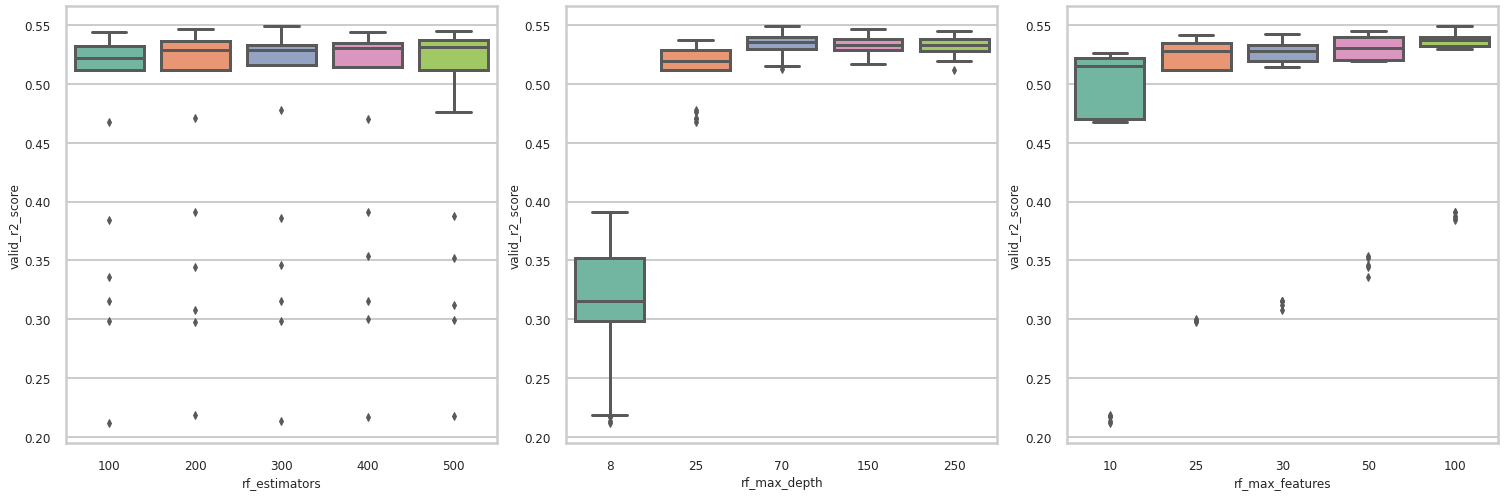

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.boxplot(data=perf_df, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.boxplot(data=perf_df, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.boxplot(data=perf_df, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()

# Refined Grid Search

In [ ]:
n_estimator = [100]
rf_max_depth = [70,75,80,90,100,125,150,175,250,200,275,300]
rf_max_features = [30,35,40,45,50,60,65,70,80,90,100,120,150,200]


rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []
for rf_estimator in n_estimator:
    for rf_depth in rf_max_depth:
        for rf_feature in rf_max_features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_r2 = pred_results['r2_score']
            valid_r2_list.append(valid_r2)
            print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_r2: {valid_r2}")

In [ ]:
perf_df2 = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df2.sort_values(by="valid_r2_score", ascending=False)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.scatterplot(data=perf_df2, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.scatterplot(data=perf_df2, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.scatterplot(data=perf_df2, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()

In [ ]:
n_estimator = [100]
rf_max_depth = [10,15,20,25,30,35,40,50]
rf_max_features = [90]


rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []
for rf_estimator in n_estimator:
    for rf_depth in rf_max_depth:
        for rf_feature in rf_max_features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_r2 = pred_results['r2_score']
            valid_r2_list.append(valid_r2)
            print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_r2: {valid_r2}")

In [ ]:
perf_df3 = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df3.sort_values(by="valid_r2_score", ascending=False)
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.scatterplot(data=perf_df3, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.scatterplot(data=perf_df3, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.scatterplot(data=perf_df3, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()

In [ ]:
perf_df3

In [ ]:
n_estimator = [100]
rf_max_depth = [25,30]
rf_max_features = [100,150]


rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []
for rf_estimator in n_estimator:
    for rf_depth in rf_max_depth:
        for rf_feature in rf_max_features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_r2 = pred_results['r2_score']
            valid_r2_list.append(valid_r2)

In [ ]:
perf_df4 = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df4.sort_values(by="valid_r2_score", ascending=False)
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.scatterplot(data=perf_df4, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.scatterplot(data=perf_df4, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.scatterplot(data=perf_df4, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()

In [ ]:
perf_df4 #100, 30,   >90 or 100/150

In [ ]:
n_estimator = [100]
rf_max_depth = [30]
rf_max_features = [105,110,115,120,125,130]


rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []
for rf_estimator in n_estimator:
    for rf_depth in rf_max_depth:
        for rf_feature in rf_max_features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_r2 = pred_results['r2_score']
            valid_r2_list.append(valid_r2)

In [ ]:
perf_df5 = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df5.sort_values(by="valid_r2_score", ascending=False)
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.scatterplot(data=perf_df5, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.scatterplot(data=perf_df5, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.scatterplot(data=perf_df5, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()

In [ ]:
perf_df5

In [ ]:
n_estimator = [100,105,110,115,120]
rf_max_depth = [30]
rf_max_features = [91,92,93,94,95,96,97,98,99,100,101,102,103,104]


rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []
for rf_estimator in n_estimator:
    for rf_depth in rf_max_depth:
        for rf_feature in rf_max_features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_r2 = pred_results['r2_score']
            valid_r2_list.append(valid_r2)

In [ ]:
perf_df6 = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df6.sort_values(by="valid_r2_score", ascending=False)

In [ ]:
n_estimator = [300,600,800,900,1000,1200]
rf_max_depth = [30]
rf_max_features = [10,20,30,50,90]


rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []
for rf_estimator in n_estimator:
    for rf_depth in rf_max_depth:
        for rf_feature in rf_max_features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_r2 = pred_results['r2_score']
            valid_r2_list.append(valid_r2)

In [ ]:
perf_df7 = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df7.sort_values(by="valid_r2_score", ascending=False)

In [ ]:
#  Retrieve model metadata and performance metrics stored in the filesystem from a hyperparameter search run.
cmp.get_filesystem_perf_results('ampl_output', pred_type='regression').sort_values(by='valid_r2_score', ascending=False)

In [ ]:
# save the best model
cmp.copy_best_filesystem_models(pred_type="regression", dest_dir=working_dir, 
                                result_dir='ampl_output', force_update=False)


# Test??

---



---




In [ ]:
! pip install molvs

In [ ]:
from atomsci.ddm.pipeline import predict_from_model

In [ ]:
# Test loading model from tarball and running predictions
predict_from_model.predict_from_model_file(model_path='curated_combined_df_1_model_a450a840-73b9-4581-857c-9ab2568bab7c.tar.gz',
                            input_df = df_avg,
                            id_col='compound_id',
                            smiles_col='base_rdkit_smiles',
                            response_col='VALUE_NUM_mean',
                            is_featurized=False,
                            dont_standardize=True)

# random search

In [ ]:
rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []

num_trials = 10

for i in range(num_trials):
    params["rf_estimators"] = np.random.randint(100,500)
    params["rf_max_depth"] = np.random.randint(8,256)
    params["rf_max_features"] = np.random.randint(100,1000)
    rfe_list.append(params["rf_estimators"])
    rfd_list.append(params["rf_max_depth"])
    rff_list.append(params["rf_max_features"])
    tp = parse.wrapper(params)

    pl = mp.ModelPipeline(tp)
    pl.train_model()

    pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
    pred_results = pred_data.get_prediction_results()
    valid_r2 = pred_results['r2_score']
    valid_r2_list.append(valid_r2)
    #print(f"rf_estimators: {rf_estimators}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_r2: {valid_r2}")

In [ ]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.scatterplot(data=perf_df, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.scatterplot(data=perf_df, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.scatterplot(data=perf_df, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()